In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

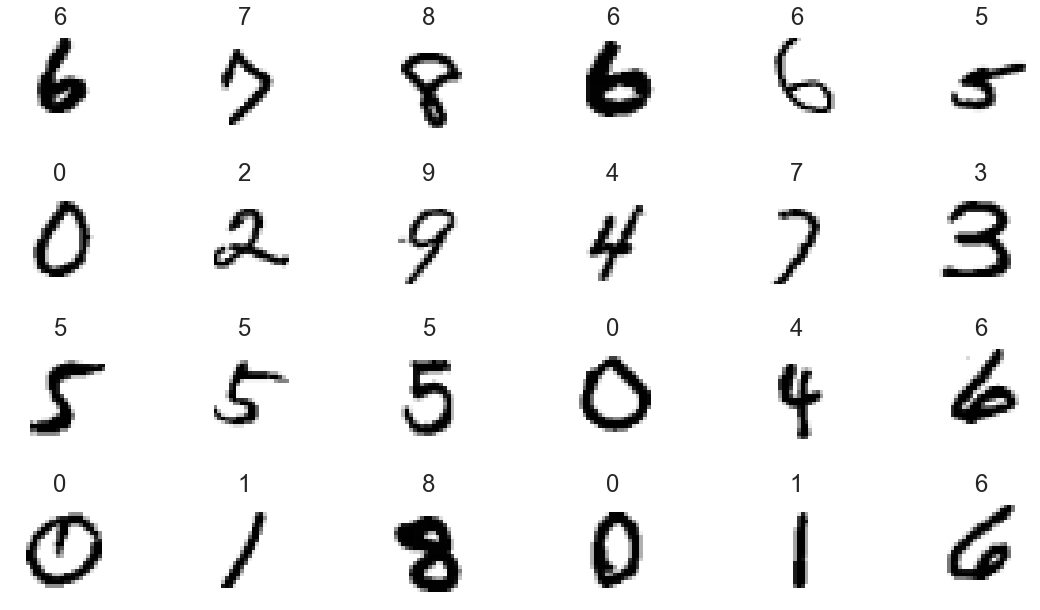

In [8]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target =item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [9]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [10]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
from tensorflow.keras.models import Sequential
cnn = Sequential()
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [17]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [18]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
cnn.add(Flatten())

In [22]:
cnn.add(Dense(units=128, activation='relu'))

In [23]:
cnn.add(Dense(units=10, activation='softmax'))

In [24]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

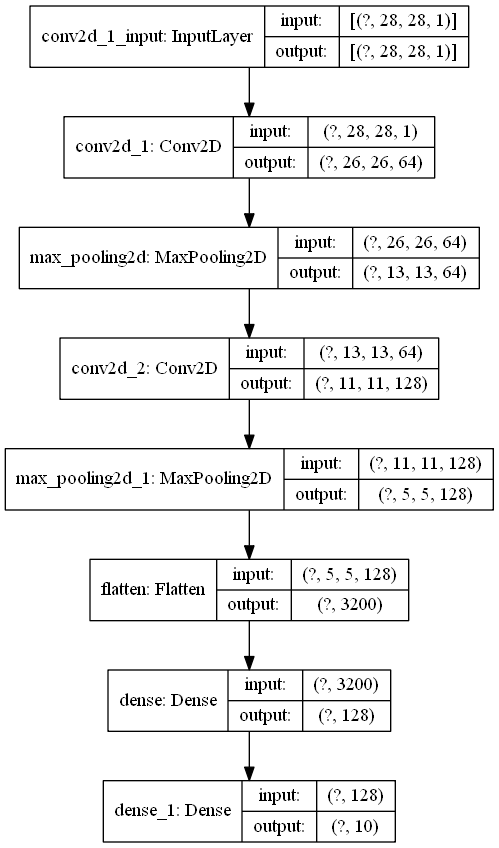

In [25]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [26]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 35s 41ms/step - loss: 0.1388 - accuracy: 0.9576 - val_loss: 0.0602 - val_accuracy: 0.9820
Epoch 2/5
844/844 [==============================] - 39s 46ms/step - loss: 0.0437 - accuracy: 0.9860 - val_loss: 0.0433 - val_accuracy: 0.9875
Epoch 3/5
844/844 [==============================] - 38s 45ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0304 - val_accuracy: 0.9913
Epoch 4/5
844/844 [==============================] - 39s 46ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0451 - val_accuracy: 0.9858
Epoch 5/5
844/844 [==============================] - 38s 45ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.0371 - val_accuracy: 0.9903


In [30]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0239 - accuracy: 0.9924


In [31]:
loss

0.02387744002044201

In [32]:
accuracy

0.9923999905586243

In [33]:
predictions = cnn.predict(X_test)

In [34]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [35]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}:{probability:.10%}')

0:0.0000000009%
1:0.0000000932%
2:0.0000010887%
3:0.0000000418%
4:0.0000000009%
5:0.0000000000%
6:0.0000000000%
7:100.0000000000%
8:0.0000000586%
9:0.0000048357%


In [37]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [38]:
len(incorrect_predictions)

76

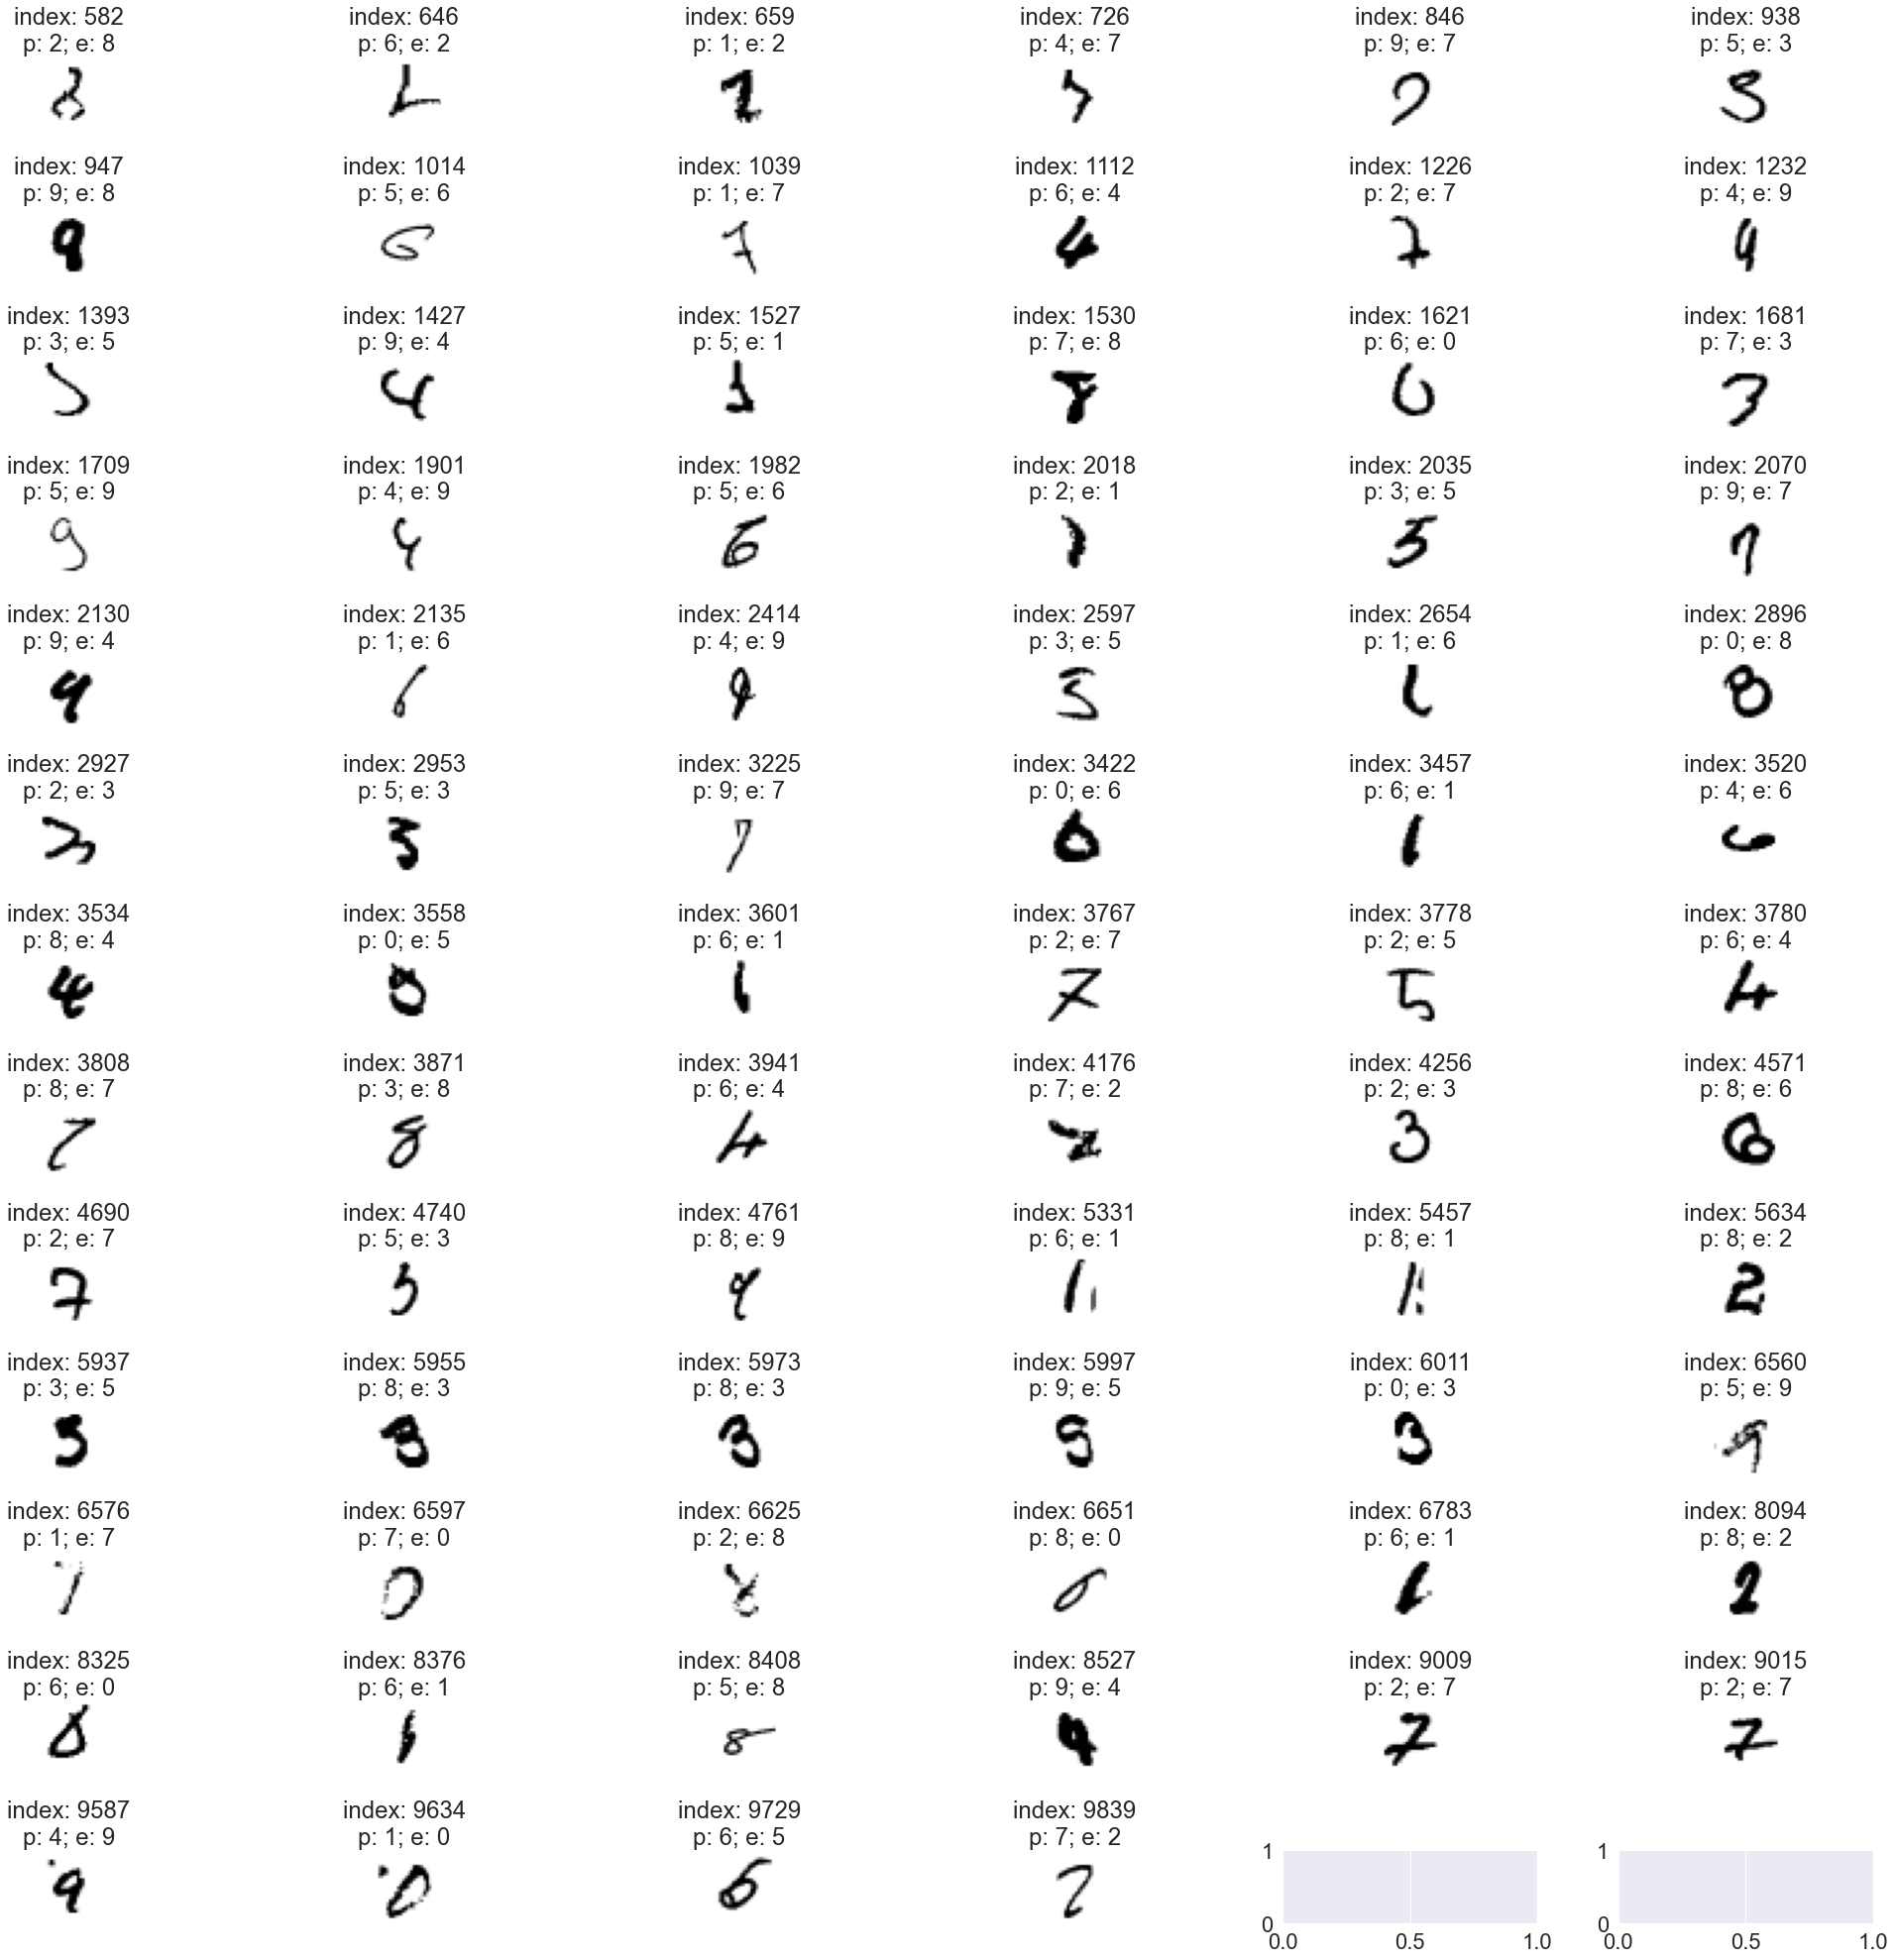

In [42]:
figure, axes = plt.subplots(nrows=13, ncols=6, figsize=(28, 28))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted ,expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [44]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [45]:
display_probabilities(predictions[582])

0: 0.0000316353%
1: 0.0012378204%
2: 64.6254420280%
3: 0.8849797770%
4: 0.0000268021%
5: 0.0000288487%
6: 0.0003373521%
7: 0.0001273559%
8: 34.4877779484%
9: 0.0000044761%


In [46]:
cnn.save('mnist_cnn.h5')

# 加载模型

可以使用tesnorflow.keras.models模块中的load_model函数加载已保存的模型：


from tensorflow.keras.models import load_model


cnn = load_model('mnist_cnn.h5')


然后，可以调用fit函数。